<p align=center><img src=https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png><p>

# <h1 align=center> **PROYECTO INDIVIDUAL Nº1** </h1>

# <h1 align=center>**`Exploratory Data Analysis`**</h1>

***Bienvenido al Análisis exploratiorio de datos realizado por Gerardo Cortijo***

*En éste notebook vamos a desarrollar un análisis exploratorio de datos para nuestros 3 datasets, comentando los cambios realizados en cada uno para la comprensión del usuario sobre lo modificado*


# Output_steam_games

Al abrir nuestro archivo *output_steam_games*, observamos que la cantidad de nulos representa más del 70% de nuestros datos totales, con lo cual procedimos a eliminar con (how='all') solo los nulos que en sus filas abarcan el total de columnas.


**Cantidad de nulos por columna**
publisher :      96362,
genres:          91593,
app_name:        88312,
title:           90360,
url:             88310,
release_date:    90377,
tags:            88473,
reviews_url:     88312,
specs:           88980,
price:           89687,
early_access:    88310,
id:              88312,
developer:       91609


Después de realizar ésta eliminación de nulos, renombramos las diferentes columnas que posee nuestro dataset df_steam_games para poder tenerlo más ordenado y verficamos de vuelta nuestra ***cantidad de nulos luego de la limpieza***: 

*publisher       8051,*
*genres          3282,*
*item_name          1,*
*title           2049,*
*url                0,*
*release_date    2066,*
*tags             162,*
*reviews_url        0,*
*specs            669,*
*price           1377,*
*early_access       0,*
*item_id            0,*
*developer       3298*

Luego de revisar nulos y duplicados, encontramos datos faltantes en genres, pero encontramos similitud con la columna tags, la cual poseía géneros del juego observado, procedemos a realizar una funcion que tome como indice los valores unicos en géneros, para iterar por fila en tags y rellenar los valores faltantes en genres, luego procedimos a eliminar tags y eliminar datos en genres como "early_acces" o "free to play" ya que no son considerados generos


Extraemos el año de "release_Date" para dejar solo el año correspondiente a los juegos, y procedemos a eliminar todas las columnas innecesarias para nuestras funciones, el dataset *Steam_Games* quedaría asi: 

Nota: todas las columnas fueron debidamente transformadas al tipo de dato requerido para nuestro futuro modelado/función solicitada


## ***Df_steam_games columns: 'genres','item_name','release_date','item_id','developer'***

# Australian User reviews

Al abrir nuestro archivo *australian user reviews* observamos solo 3 columnas, las cuales son user_id, user_url y reviews, ésta ultima se encuentra anidada en listas, así que procedemos a desanidarla utilizando Explode


***user_id	,user_url	,funny	,posted	,last_edited	,item_id	,helpful	,recommend	,review,	0***

éstas son las columnas que nos quedan una vez desanidado reviews, procedemos a eliminar la columna "0", "helpful", "last_edited" y "funny" que son irrelevantes para nuestro análisis

Luego, rellenamos la columna "year" con la media para poder sacar los valores faltantes, ésta columna es relevante para nuestro analisis y modelado futuro de datos, por lo tanto utilizamos .median en year

### Análisis de sentimiento


Para nuestro análisis de sentimiento, utilizamos la libreria NLTK, la cual, con sentiment_vader, explora las reviews analizando el texto y devuelve valores como 0,1,2, en los cuales 2 es positivo, 1 es neutral(el cual tambien puede ser contemplado para usuarios que no dejaron reseña) y 0 para negativo, añadiendo la columna "sentiment_analysis" para nuestro dataset


Acá podemos observar la cantidad de sentimientos en el total de reviews, siendo más positivos que negativos y neutros

***sentiment_analysis***
***2 :   33524,***
***1  :  13062,***
***0   : 12747***

Seguido a lo realizado, procedemos a eliminar duplicados y nulos, que para nuestra grata sorpresa eran bastante pocos y pudimos continuar al siguiente dataset, obteniendo user_reviews de esta manera:
'user_id',	'user_url',	'item_id'	,'recommend',	'year',	'sentiment_analysis',

# Australian user items


Al abrir nuestro dataset, nos encontramos con las siguientes columnas: 
'user_id'	'items_count'	'steam_id'	'user_url'	'items'

procedemos a eliminar los nulos, con "how='all'", luego eliminamos las filas donde user_id o items_count son nulos, luego realizamos un codigo que borre los usuarios que tengan "items_count = 0" ya que no poseen juegos.

luego de eliminar duplicados y nulos, junto con columnas irrelevantes para nuestro análisis, nos quedaría un dataset así:
'item_id'	'item_name'	'playtime_forever'	'user_id'	'items_count'

## ACLARACIÓN IMPORTANTE:
Durante el proceso de ETL en los 3 datasets, podrán observar el uso de **Data Wrangler**, una extensión que nos facilita estos procesos

<img src="https://pbs.twimg.com/media/FLvYr91XEAAAX6f.jpg" width="250" height="150">

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [7]:
Steam_games = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/Steam_games.parquet')
user_reviews = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/user_reviews.parquet')
user_items = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/user_items.parquet')

### Realizamos 2 merge para obtener nuestros datos mas completos en cuanto a columnas para nuestras funciones


In [8]:
ReviewsxSteam = user_reviews.merge(Steam_games, on='item_id')

In [9]:
ReviewsxItems = user_reviews.merge(user_items, on='item_id')

In [10]:
# borramos user id_x que devolvía valores erróneos
ReviewsxItems = ReviewsxItems.drop(columns=['user_id_x'])
# renombramos la columna "user_id_y" a "user_id"
ReviewsxItems = ReviewsxItems.rename(columns={'user_id_y': 'user_id'})

In [11]:
# Eliminamos los duplicados manteniendo la primera ocurrencia
ReviewsxItems = ReviewsxItems.drop_duplicates(subset='user_id', keep='first')

# Top 3 juegos mas recomendados por año 

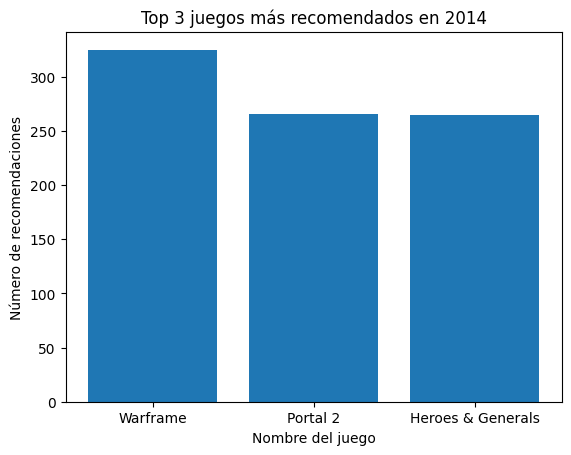

In [12]:
# Selecciona el año
año_seleccionado = 2014
# Filtra los datos para el año seleccionado y las recomendaciones positivas
df_filtrado = ReviewsxItems[(ReviewsxItems['year'] == año_seleccionado) & ((ReviewsxItems['recommend'] == True) | (ReviewsxItems['sentiment_analysis'] == 2))]
# Cuenta las recomendaciones para cada juego
recommend_count = df_filtrado['item_name'].value_counts()
# Selecciona los 3 juegos con más recomendaciones
top_3_games = recommend_count.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_games.index, top_3_games.values)
plt.title('Top 3 juegos más recomendados en ' + str(año_seleccionado))
plt.xlabel('Nombre del juego')
plt.ylabel('Número de recomendaciones')
plt.show()

In [13]:
#Removemos la columna "user_url" y renombramos "user_id"
ReviewsxItems = ReviewsxItems.drop(columns=['user_url'])
ReviewsxItems = ReviewsxItems.rename(columns={'user_id_y': 'user_id'})


### Obtuvimos errores en 'genres' debido al merge que hicimos, vamos a corregirlo


In [14]:
# Realizamos conversion ( por las dudas ) para item_id asi realizamos un merge preciso
ReviewsxItems['item_id'] = ReviewsxItems['item_id'].astype(int)
ReviewsxSteam['item_id'] = ReviewsxSteam['item_id'].astype(int)
# Realiza la fusión
Df_final = pd.merge(ReviewsxSteam, ReviewsxItems[['item_id', 'playtime_forever']], on='item_id', how='inner')

In [15]:
Df_final = Df_final.drop_duplicates(subset=['user_id', 'item_id'])


In [16]:
#Eliminamos los nulos que aparecieron en nuestro merge
def clean_data(Df_final):
    # elimino filas de user_id nulas y borramos user url
    Df_final = Df_final.dropna(subset=['user_id'])
    Df_final = Df_final.drop(columns=['user_url'])
    return Df_final
Df_final = Df_final = clean_data(Df_final)

In [17]:

#Procedemos a cambiar los tipos de dato de cada columna
Df_final = Df_final.astype({'playtime_forever': 'int64'})
Df_final = Df_final.astype({'sentiment_analysis': 'int64'})
Df_final = Df_final.astype({'release_date': 'int64'})
Df_final = Df_final.astype({'year': 'int64'})
Df_final = Df_final.astype({'item_id': 'int64'})


In [20]:
Df_final

,user_id,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,[],playtime_forever
0,Hype_R,10,True,2014,2,Action,Counter-Strike,2000,Valve,0,0
88,lanatbeonakeehsasamokoshtan,10,True,2014,2,Action,Counter-Strike,2000,Valve,0,0
176,76561198089673598,10,True,2014,1,Action,Counter-Strike,2000,Valve,0,0
264,nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0,0
352,76561198134580826,10,True,2014,2,Action,Counter-Strike,2000,Valve,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15433103,dream2506,510050,True,2014,1,Free to Play,You Have 10 Seconds,2016,tamationgames,0,0
15433123,76561198021048954,521340,True,2014,2,Casual,True or False,2016,Vladimir Maslov,0,0
15433133,76561198009992783,521340,True,2014,2,Casual,True or False,2016,Vladimir Maslov,0,0
15433143,76561198071122396,521570,True,2014,1,Casual,You Have 10 Seconds 2,2016,Tamationgames,0,0


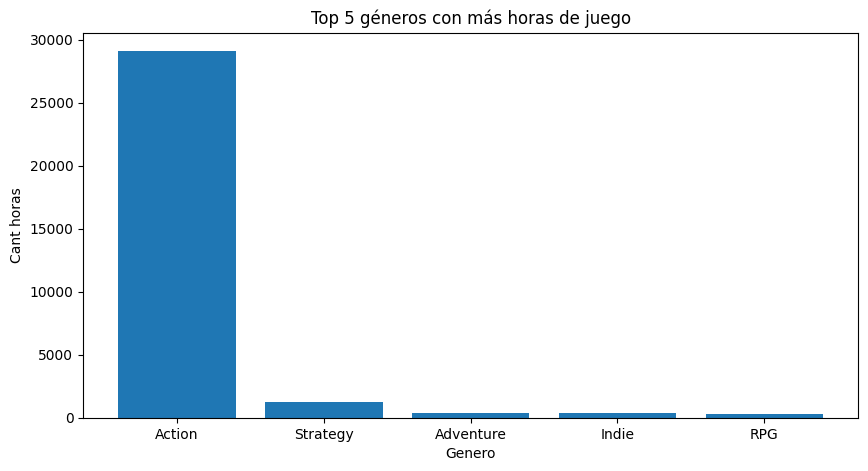

In [23]:


# Agrupar por genero y sumar el tiempo de juego
grouped_df = Df_final.groupby('genres')['playtime_forever'].sum() / 60

# Ordenar y seleccionar los 5 generos con mas tiempo de juego
top_5 = grouped_df.sort_values(ascending=False).head(5)

# Generar el gráfico de barras
plt.figure(figsize=(10,5))
plt.bar(top_5.index, top_5.values)
plt.title('Top 5 géneros con más horas de juego')
plt.xlabel('Genero')
plt.ylabel('Cant horas')
plt.show()

# Top 3 usuarios con más horas jugadas para el género elegido

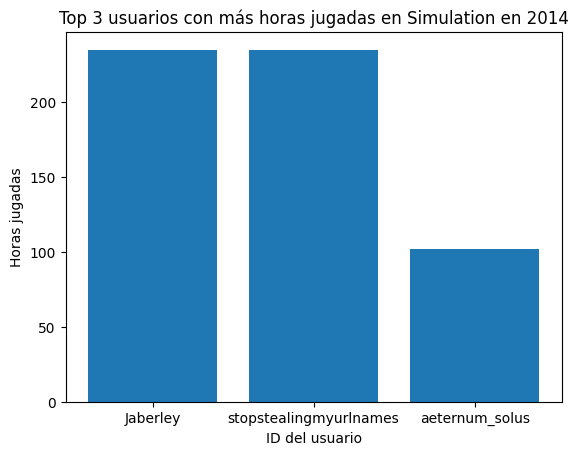

In [ ]:

# Selecciona el género y el año
Selecciona_genero = 'Simulation'
year_selected = 2014
# Filtra los datos para el género y el año seleccionados
df_filtrado1 = Df_final[(Df_final['genres'] == Selecciona_genero) & (Df_final['year'] == year_selected)]
# Suma las horas jugadas para cada usuario
playtime_sum = df_filtrado1.groupby('user_id')['playtime_forever'].sum()
# Selecciona los 3 usuarios con más horas jugadas
top_3_users = playtime_sum.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_users.index, top_3_users.values)
plt.title('Top 3 usuarios con más horas jugadas en ' + Selecciona_genero + ' en ' + str(year_selected))
plt.xlabel('ID del usuario')
plt.ylabel('Horas jugadas')
plt.show()

# Top 3 desarrolladores con reseñas negativas para el año seleccionado

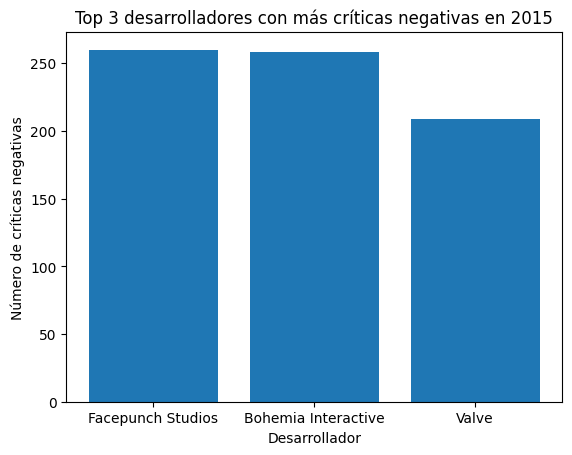

In [ ]:
# Selecciona el año
año_selecc = 2015
# Filtra los datos para el año seleccionado, las críticas negativas y los desarrolladores distintos de 'SinDato'
df_filtered = ReviewsxSteam.loc[(ReviewsxSteam['year'] == año_selecc) & (ReviewsxSteam['recommend'] == False) & (ReviewsxSteam['developer'] != 'SinDato')]
# Cuenta las críticas negativas para cada desarrollador
negative_reviews_count = df_filtered['developer'].value_counts()
# Selecciona los 3 desarrolladores con más críticas negativas
top_3_bad_developers = negative_reviews_count.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_bad_developers.index, top_3_bad_developers.values)
plt.title('Top 3 desarrolladores con más críticas negativas en ' + str(año_selecc))
plt.xlabel('Desarrollador')
plt.ylabel('Número de críticas negativas')
plt.show()

Análisis de sentimiento a lo largo del tiempo 

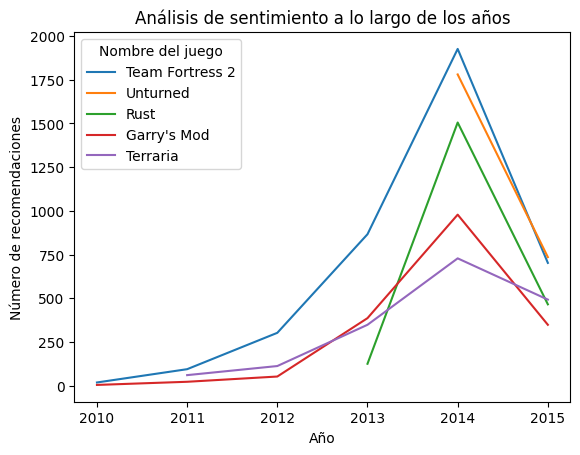

In [ ]:
# Filtra los datos para las recomendaciones positivas
df_filtrado2 = ReviewsxSteam[ReviewsxSteam['sentiment_analysis'] == 2]
# Cuenta las recomendaciones para cada juego y cada año
recommend_count = df_filtrado2.groupby(['item_name', 'year']).size()
# Selecciona los 10 juegos con más recomendaciones en total
top10juegos = recommend_count.groupby('item_name').sum().nlargest(5).index
# Filtra los datos para los 10 juegos con más recomendaciones
top10filtrado = recommend_count.loc[top10juegos]
# Genera el gráfico de líneas
top10filtrado.unstack('item_name').plot(kind='line')
plt.title('Análisis de sentimiento a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(title='Nombre del juego')
plt.show()

Cantidad de sentiment analysis a lo largo de los años 

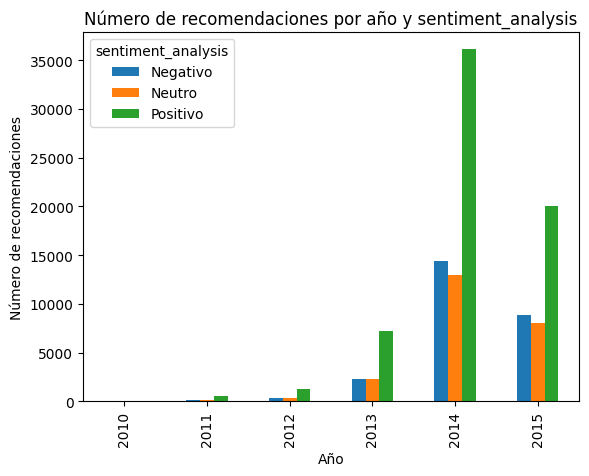

In [ ]:
# Cuenta las recomendaciones para cada año y cada valor de 'sentiment_analysis'
recommend_count = ReviewsxSteam.groupby(['year', 'sentiment_analysis']).size()
# Genera el gráfico de barras
recommend_count.unstack('sentiment_analysis').plot(kind='bar', stacked=False)
plt.title('Número de recomendaciones por año y sentiment_analysis')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(['Negativo', 'Neutro', 'Positivo'], title='sentiment_analysis')
plt.show()

In [ ]:
Df_final.to_parquet('DF_final.parquet')
ReviewsxItems.to_parquet('df_itemsR.parquet')
ReviewsxSteam.to_parquet('df_reviewsG.parquet')